In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
import numpy as np

In [2]:
rep_csv = "RepCountyResults2016_TV.csv"
dem_csv = "DemCountyResults2016_TV.csv"

rep_df = pd.read_csv(rep_csv)
dem_df = pd.read_csv(dem_csv)

In [3]:
demrep_votes = dem_df.set_index('County').join(rep_df.set_index('County'), lsuffix='_dem', rsuffix='_rep')

In [4]:
demrep_votes

,Unnamed: 0_dem,Office/Ballot Issue_dem,Party_dem,Candidate/Judge/Ballot Issue Title_dem,Yes Votes/Percentage_Dem,Total_Dem_Votes,Total_Dem_Percent,Unnamed: 0_rep,Office/Ballot Issue_rep,Party_rep,Candidate/Judge/Ballot Issue Title_rep,Yes Votes/Percentage_Rep,Total_Rep_Votes,Total_Rep_Percent,Unnamed: 8
County,,,,,,,,,,,,,,,
ADAMS,0,President/Vice President,Democratic Party,Hillary Clinton / Tim Kaine,"96,558","1,338,870",48.16%,65,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,"80,082","1,202,484",43.25%,NaN
ALAMOSA,1,President/Vice President,Democratic Party,Hillary Clinton / Tim Kaine,"3,189","1,338,870",48.16%,66,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,"3,046","1,202,484",43.25%,NaN
ARAPAHOE,2,President/Vice President,Democratic Party,Hillary Clinton / Tim Kaine,"159,885","1,338,870",48.16%,67,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,"117,053","1,202,484",43.25%,NaN
ARCHULETA,3,President/Vice President,Democratic Party,Hillary Clinton / Tim Kaine,"2,500","1,338,870",48.16%,68,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,"4,264","1,202,484",43.25%,NaN
BACA,4,President/Vice President,Democratic Party,Hillary Clinton / Tim Kaine,283,"1,338,870",48.16%,69,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,"1,753","1,202,484",43.25%,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUMMIT,59,President/Vice President,Democratic Party,Hillary Clinton / Tim Kaine,"9,557","1,338,870",48.16%,124,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,"5,100","1,202,484",43.25%,NaN
TELLER,60,President/Vice President,Democratic Party,Hillary Clinton / Tim Kaine,"3,603","1,338,870",48.16%,125,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,"9,745","1,202,484",43.25%,NaN
WASHINGTON,61,President/Vice President,Democratic Party,Hillary Clinton / Tim Kaine,296,"1,338,870",48.16%,126,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,"2,299","1,202,484",43.25%,NaN


In [5]:
demrep_clean = demrep_votes.drop(columns=['Unnamed: 0_dem','Unnamed: 0_rep'])
demrep_clean

,Office/Ballot Issue_dem,Party_dem,Candidate/Judge/Ballot Issue Title_dem,Yes Votes/Percentage_Dem,Total_Dem_Votes,Total_Dem_Percent,Office/Ballot Issue_rep,Party_rep,Candidate/Judge/Ballot Issue Title_rep,Yes Votes/Percentage_Rep,Total_Rep_Votes,Total_Rep_Percent,Unnamed: 8
County,,,,,,,,,,,,,
ADAMS,President/Vice President,Democratic Party,Hillary Clinton / Tim Kaine,"96,558","1,338,870",48.16%,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,"80,082","1,202,484",43.25%,NaN
ALAMOSA,President/Vice President,Democratic Party,Hillary Clinton / Tim Kaine,"3,189","1,338,870",48.16%,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,"3,046","1,202,484",43.25%,NaN
ARAPAHOE,President/Vice President,Democratic Party,Hillary Clinton / Tim Kaine,"159,885","1,338,870",48.16%,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,"117,053","1,202,484",43.25%,NaN
ARCHULETA,President/Vice President,Democratic Party,Hillary Clinton / Tim Kaine,"2,500","1,338,870",48.16%,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,"4,264","1,202,484",43.25%,NaN
BACA,President/Vice President,Democratic Party,Hillary Clinton / Tim Kaine,283,"1,338,870",48.16%,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,"1,753","1,202,484",43.25%,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUMMIT,President/Vice President,Democratic Party,Hillary Clinton / Tim Kaine,"9,557","1,338,870",48.16%,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,"5,100","1,202,484",43.25%,NaN
TELLER,President/Vice President,Democratic Party,Hillary Clinton / Tim Kaine,"3,603","1,338,870",48.16%,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,"9,745","1,202,484",43.25%,NaN
WASHINGTON,President/Vice President,Democratic Party,Hillary Clinton / Tim Kaine,296,"1,338,870",48.16%,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,"2,299","1,202,484",43.25%,NaN


In [6]:
#demrep_clean = demrep_clean[0:64]
#demrep_clean

,Office/Ballot Issue_dem,Party_dem,Candidate/Judge/Ballot Issue Title_dem,Yes Votes/Percentage_Dem,Total_Dem_Votes,Total_Dem_Percent,Office/Ballot Issue_rep,Party_rep,Candidate/Judge/Ballot Issue Title_rep,Yes Votes/Percentage_Rep,Total_Rep_Votes,Total_Rep_Percent
County,,,,,,,,,,,,
ADAMS,President/Vice President,Democratic Party,Joseph R. Biden / Kamala D. Harris,"134,202","1,804,352",55.40%,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,"95,657","1,364,607",41.90%
ALAMOSA,President/Vice President,Democratic Party,Joseph R. Biden / Kamala D. Harris,"3,759","1,804,352",55.40%,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,"3,813","1,364,607",41.90%
ARAPAHOE,President/Vice President,Democratic Party,Joseph R. Biden / Kamala D. Harris,"213,607","1,804,352",55.40%,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,"127,323","1,364,607",41.90%
ARCHULETA,President/Vice President,Democratic Party,Joseph R. Biden / Kamala D. Harris,"3,738","1,804,352",55.40%,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,"5,189","1,364,607",41.90%
BACA,President/Vice President,Democratic Party,Joseph R. Biden / Kamala D. Harris,317,"1,804,352",55.40%,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,"1,867","1,364,607",41.90%
...,...,...,...,...,...,...,...,...,...,...,...,...
SUMMIT,President/Vice President,Democratic Party,Joseph R. Biden / Kamala D. Harris,"12,631","1,804,352",55.40%,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,"5,322","1,364,607",41.90%
TELLER,President/Vice President,Democratic Party,Joseph R. Biden / Kamala D. Harris,"5,278","1,804,352",55.40%,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,"11,241","1,364,607",41.90%
WASHINGTON,President/Vice President,Democratic Party,Joseph R. Biden / Kamala D. Harris,369,"1,804,352",55.40%,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,"2,595","1,364,607",41.90%


In [6]:
demrep_clean.to_csv('DemRepCountyJoin2016.csv')

## Visualizations

In [8]:
vote_graphs = demrep_clean.reset_index()
vote_graphs

,County,Office/Ballot Issue_dem,Party_dem,Candidate/Judge/Ballot Issue Title_dem,Yes Votes/Percentage_Dem,Total_Dem_Votes,Total_Dem_Percent,Office/Ballot Issue_rep,Party_rep,Candidate/Judge/Ballot Issue Title_rep,Yes Votes/Percentage_Rep,Total_Rep_Votes,Total_Rep_Percent
0,ADAMS,President/Vice President,Democratic Party,Joseph R. Biden / Kamala D. Harris,"134,202","1,804,352",55.40%,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,"95,657","1,364,607",41.90%
1,ALAMOSA,President/Vice President,Democratic Party,Joseph R. Biden / Kamala D. Harris,"3,759","1,804,352",55.40%,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,"3,813","1,364,607",41.90%
2,ARAPAHOE,President/Vice President,Democratic Party,Joseph R. Biden / Kamala D. Harris,"213,607","1,804,352",55.40%,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,"127,323","1,364,607",41.90%
3,ARCHULETA,President/Vice President,Democratic Party,Joseph R. Biden / Kamala D. Harris,"3,738","1,804,352",55.40%,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,"5,189","1,364,607",41.90%
4,BACA,President/Vice President,Democratic Party,Joseph R. Biden / Kamala D. Harris,317,"1,804,352",55.40%,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,"1,867","1,364,607",41.90%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,SUMMIT,President/Vice President,Democratic Party,Joseph R. Biden / Kamala D. Harris,"12,631","1,804,352",55.40%,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,"5,322","1,364,607",41.90%
60,TELLER,President/Vice President,Democratic Party,Joseph R. Biden / Kamala D. Harris,"5,278","1,804,352",55.40%,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,"11,241","1,364,607",41.90%
61,WASHINGTON,President/Vice President,Democratic Party,Joseph R. Biden / Kamala D. Harris,369,"1,804,352",55.40%,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,"2,595","1,364,607",41.90%
62,WELD,President/Vice President,Democratic Party,Joseph R. Biden / Kamala D. Harris,"66,060","1,804,352",55.40%,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,"96,145","1,364,607",41.90%


In [9]:
vote_graphs = vote_graphs.apply(lambda x: x.str.replace(',', ''))
vote_graphs

,County,Office/Ballot Issue_dem,Party_dem,Candidate/Judge/Ballot Issue Title_dem,Yes Votes/Percentage_Dem,Total_Dem_Votes,Total_Dem_Percent,Office/Ballot Issue_rep,Party_rep,Candidate/Judge/Ballot Issue Title_rep,Yes Votes/Percentage_Rep,Total_Rep_Votes,Total_Rep_Percent
0,ADAMS,President/Vice President,Democratic Party,Joseph R. Biden / Kamala D. Harris,134202,1804352,55.40%,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,95657,1364607,41.90%
1,ALAMOSA,President/Vice President,Democratic Party,Joseph R. Biden / Kamala D. Harris,3759,1804352,55.40%,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,3813,1364607,41.90%
2,ARAPAHOE,President/Vice President,Democratic Party,Joseph R. Biden / Kamala D. Harris,213607,1804352,55.40%,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,127323,1364607,41.90%
3,ARCHULETA,President/Vice President,Democratic Party,Joseph R. Biden / Kamala D. Harris,3738,1804352,55.40%,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,5189,1364607,41.90%
4,BACA,President/Vice President,Democratic Party,Joseph R. Biden / Kamala D. Harris,317,1804352,55.40%,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,1867,1364607,41.90%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,SUMMIT,President/Vice President,Democratic Party,Joseph R. Biden / Kamala D. Harris,12631,1804352,55.40%,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,5322,1364607,41.90%
60,TELLER,President/Vice President,Democratic Party,Joseph R. Biden / Kamala D. Harris,5278,1804352,55.40%,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,11241,1364607,41.90%
61,WASHINGTON,President/Vice President,Democratic Party,Joseph R. Biden / Kamala D. Harris,369,1804352,55.40%,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,2595,1364607,41.90%
62,WELD,President/Vice President,Democratic Party,Joseph R. Biden / Kamala D. Harris,66060,1804352,55.40%,President/Vice President,Republican Party,Donald J. Trump / Michael R. Pence,96145,1364607,41.90%


In [10]:
vote_graphs['Yes Votes/Percentage_Dem'] = pd.to_numeric(vote_graphs['Yes Votes/Percentage_Dem'])

In [11]:
vote_graphs['Yes Votes/Percentage_Rep'] = pd.to_numeric(vote_graphs['Yes Votes/Percentage_Rep'])

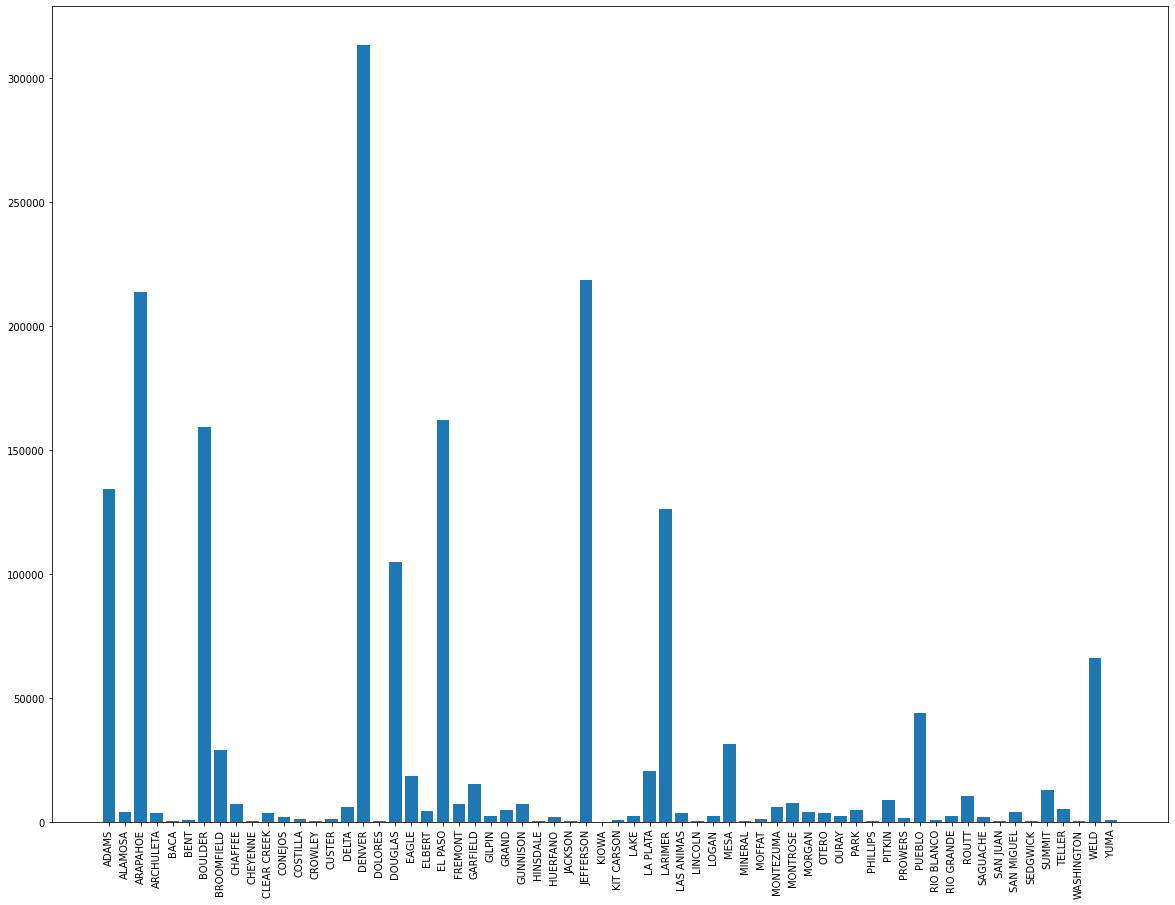

In [12]:
x_value = vote_graphs['County']
y_value = vote_graphs['Yes Votes/Percentage_Dem']

x_axis = np.arange(len(x_value))
tick_locations = [value for value in x_axis] 

#y_axis = np.arange(len(y_value))
#tick_locations_y = [value for value in y_axis] 

plt.figure(figsize=(20,15))
plt.bar(x_value, y_value)
plt.xticks(tick_locations, x_value, rotation='vertical')
#plt.yticks(tick_locations_y, y_value)
plt.show()

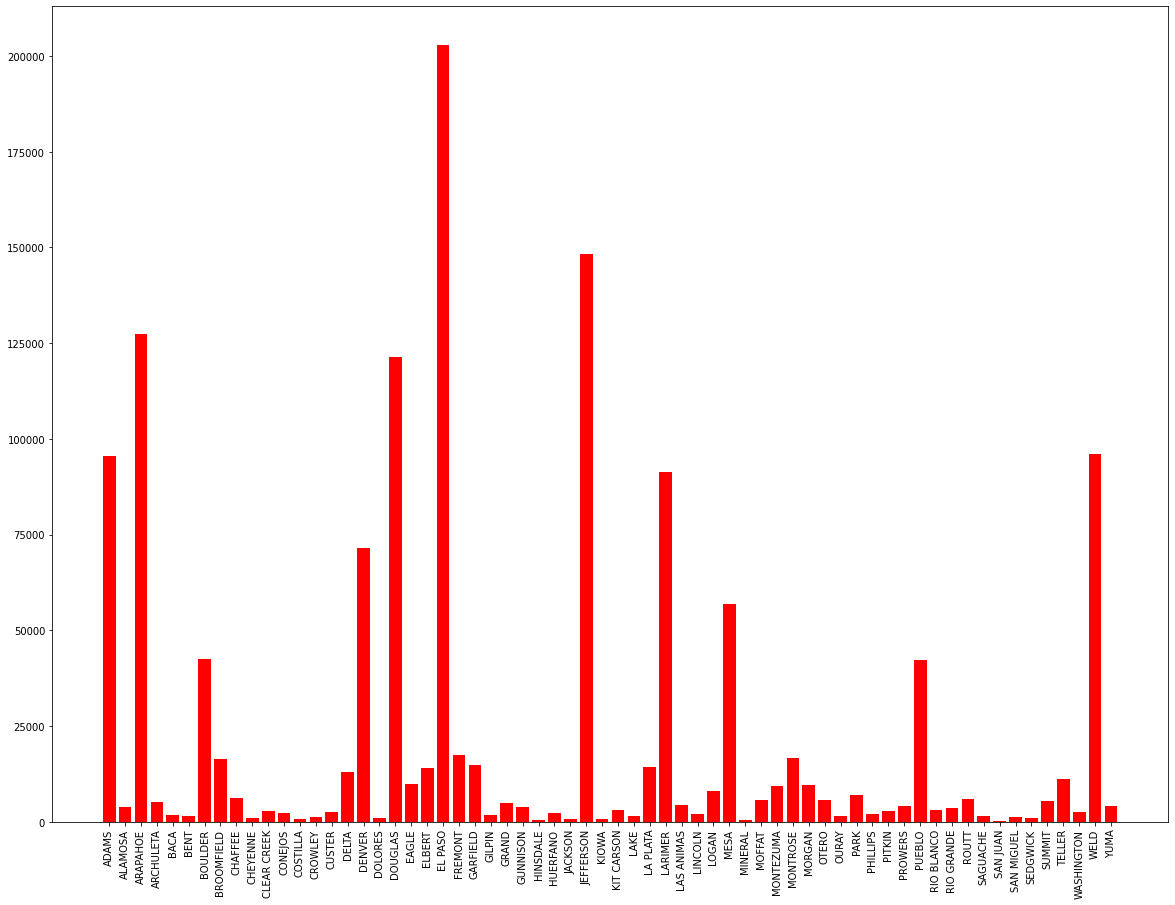

In [13]:
x_value = vote_graphs['County']
y_value = vote_graphs['Yes Votes/Percentage_Rep']

x_axis = np.arange(len(x_value))
tick_locations = [value for value in x_axis] 

#y_axis = np.arange(len(y_value))
#tick_locations_y = [value for value in y_axis] 

plt.figure(figsize=(20,15))
plt.bar(x_value, y_value, color='red')
plt.xticks(tick_locations, x_value, rotation='vertical')
#plt.yticks(tick_locations_y, y_value)
plt.show()

In [24]:
labellist = []

county_labels = vote_graphs['County']
for x in county_labels:
    labellist.append(x)
    
labellist

['ADAMS',
 'ALAMOSA',
 'ARAPAHOE',
 'ARCHULETA',
 'BACA',
 'BENT',
 'BOULDER',
 'BROOMFIELD',
 'CHAFFEE',
 'CHEYENNE',
 'CLEAR CREEK',
 'CONEJOS',
 'COSTILLA',
 'CROWLEY',
 'CUSTER',
 'DELTA',
 'DENVER',
 'DOLORES',
 'DOUGLAS',
 'EAGLE',
 'ELBERT',
 'EL PASO',
 'FREMONT',
 'GARFIELD',
 'GILPIN',
 'GRAND',
 'GUNNISON',
 'HINSDALE',
 'HUERFANO',
 'JACKSON',
 'JEFFERSON',
 'KIOWA',
 'KIT CARSON',
 'LAKE',
 'LA PLATA',
 'LARIMER',
 'LAS ANIMAS',
 'LINCOLN',
 'LOGAN',
 'MESA',
 'MINERAL',
 'MOFFAT',
 'MONTEZUMA',
 'MONTROSE',
 'MORGAN',
 'OTERO',
 'OURAY',
 'PARK',
 'PHILLIPS',
 'PITKIN',
 'PROWERS',
 'PUEBLO',
 'RIO BLANCO',
 'RIO GRANDE',
 'ROUTT',
 'SAGUACHE',
 'SAN JUAN',
 'SAN MIGUEL',
 'SEDGWICK',
 'SUMMIT',
 'TELLER',
 'WASHINGTON',
 'WELD',
 'YUMA']

<Figure size 720x432 with 0 Axes>

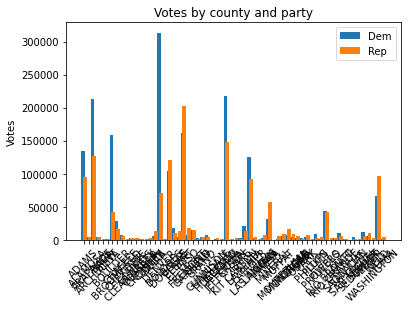

In [37]:
dem_votes = vote_graphs['Yes Votes/Percentage_Dem']
rep_votes = vote_graphs['Yes Votes/Percentage_Rep']
county_names = vote_graphs['County']

labellist = labellist

ind = np.arange(len(dem_votes))  # the x locations for the groups
width = 0.35  # the width of the bars

tickvalues = range(0,len(county_names))
fig = plt.figure(figsize=(10,6))
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, dem_votes, label='Dem')
rects2 = ax.bar(ind + width/2, rep_votes, label='Rep')

ax.set_ylabel('Votes')
ax.set_title('Votes by county and party')
ax.set_xticks(ticks = tickvalues)
ax.set_xticklabels(labellist, rotation=45)
ax.legend()

#plt.figure(figsize=(30,20))

plt.show()


<Figure size 1440x1440 with 0 Axes>

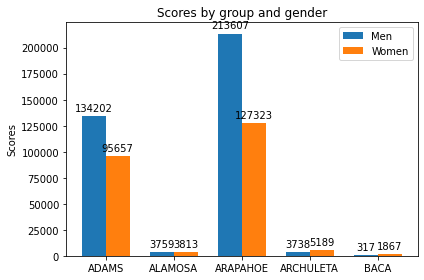

In [44]:

labels = county_names[0:5]
men_means = dem_votes[0:5]
women_means = rep_votes[0:5]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()